In [163]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 9]

Q1. Plot the daily closing price of Bitcoin and Ethereum together on to the same graph?

In [164]:
df = pd.read_csv('data/crypto.csv')
df['Asset_Name'].value_counts()

Asset_Name
Bitcoin Cash        1360
Binance Coin        1360
Bitcoin             1360
EOS.IO              1360
Ethereum Classic    1360
Ethereum            1360
Litecoin            1360
Monero              1360
TRON                1324
Stellar             1314
Cardano             1254
IOTA                1232
Maker               1204
Dogecoin             894
Name: count, dtype: int64

<Axes: xlabel='timestamp'>

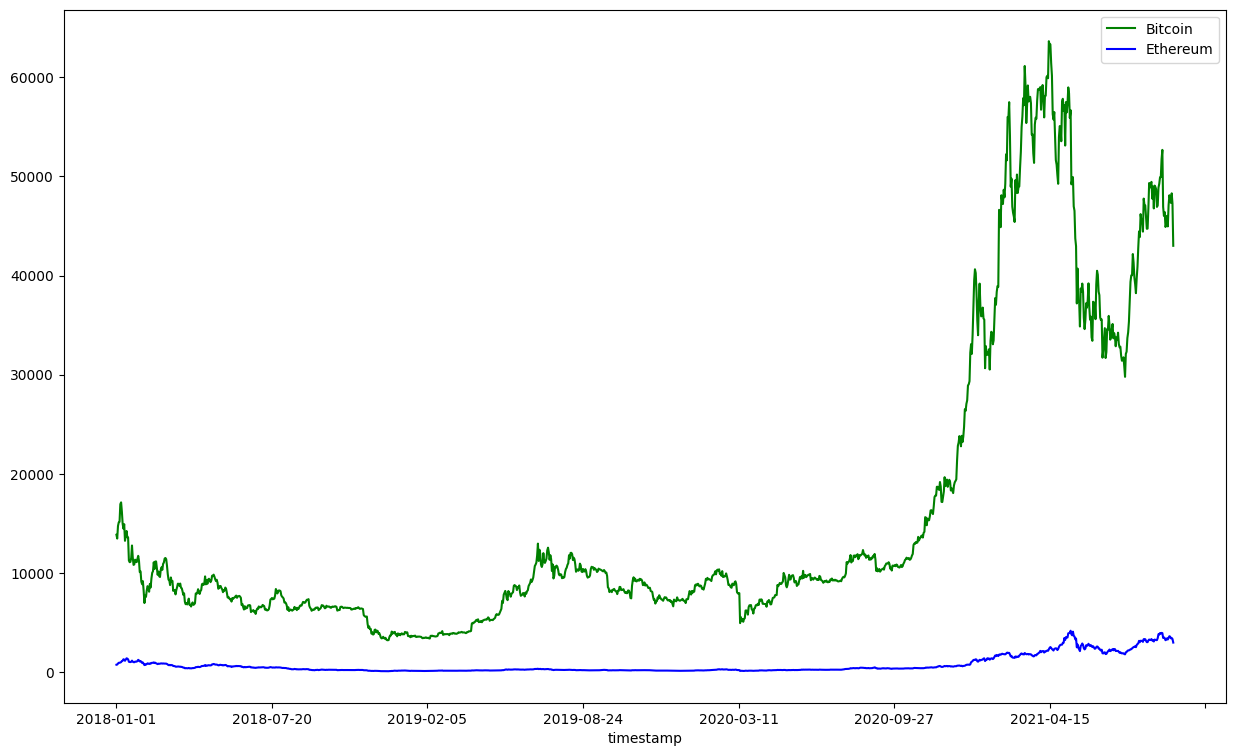

In [165]:
ax = plt.gca()
bitcoin = df[ df["Asset_Name"] == "Bitcoin"].copy() #taking a subset of df and without .copy any changes to bitcoin will change original df which is 
bitcoin.plot(kind="line", color="green",x="timestamp", y="Close",ax=ax, label="Bitcoin")

ethereum = df[ df["Asset_Name"] == "Ethereum"].copy()
ethereum.plot(kind="line", color="blue",x="timestamp", y="Close",ax=ax, label="Ethereum")

In [ ]:
#Instead of making a copy of a subset of the rows in df, use groupby to split rows into buckets based on their asset name!
#https://www.geeksforgeeks.org/pandas-groupby/

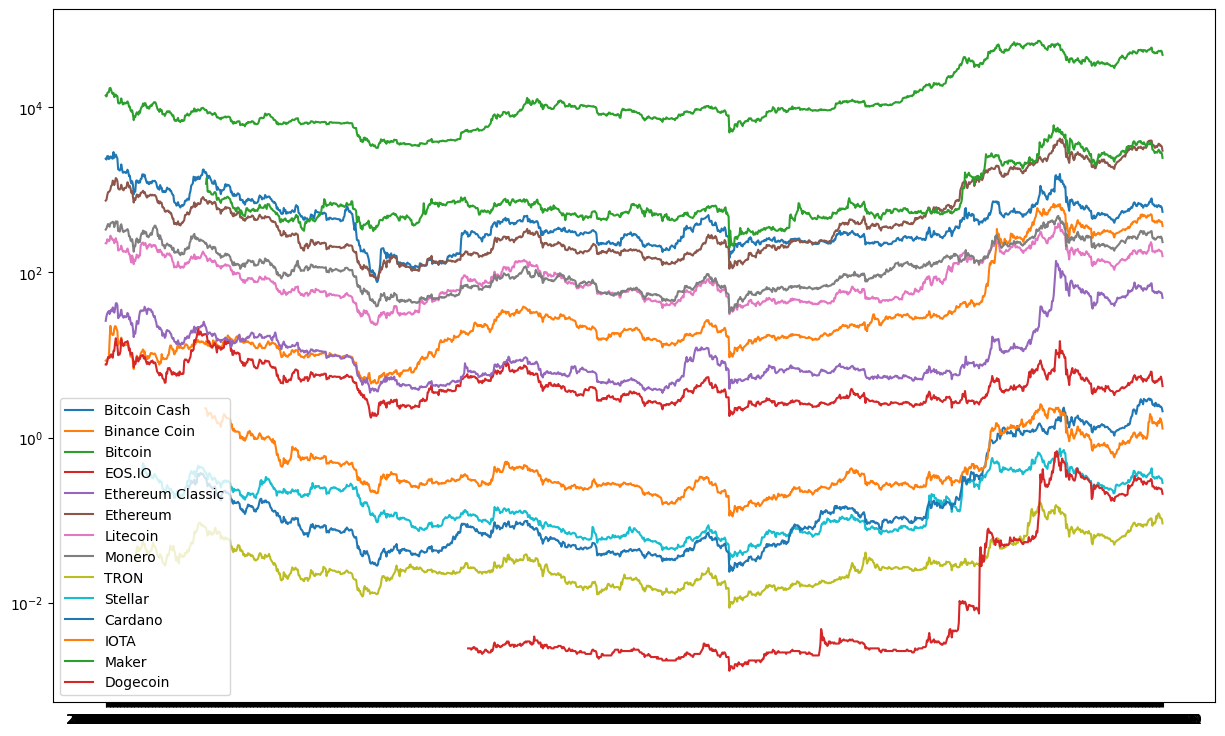

In [166]:
#plotting them all as logs to see which coins display behaviour to Bitcoin and Ethereum
assets = df["Asset_Name"].unique().tolist()

for asset in assets:
    coin = df[ df["Asset_Name"] == asset]
    plt.plot(coin["timestamp"], coin["Close"], label=asset)
    plt.yscale('log')
plt.legend()

In [ ]:
We see that Dogecoin doesn't follow the pattern of Bitcoin and Ethereum while all other coins follow the same pattern

Q2. The simple moving average is a technical indicator that investors and traders use to determine the trend of a crypto-currency e.g. whether it is going up in price, or going down. The simple moving average of a series can be calculated by adding up all of the values during a specific period and dividing them by the length of the period. For example, the three day simple moving average of the series [1, 2, 3, 4, 5] is [(1 + 2 + 3) / 3, (2 + 3 + 4) / 3, (3 + 4 + 5) / 3] = [2, 3, 4] which indicates that this series has a positive trend.

We use rolling average to smooth out spikes in graph above so we can just see the overall trend in closing prices as opposed to seeing closing prices changing hugely from day to day like in the graphs above.

In [ ]:
  a) Plot the simple moving average of the daily closing price of Bitcoin for each day

In [ ]:
    i) using the previous three day period

<Axes: xlabel='timestamp'>

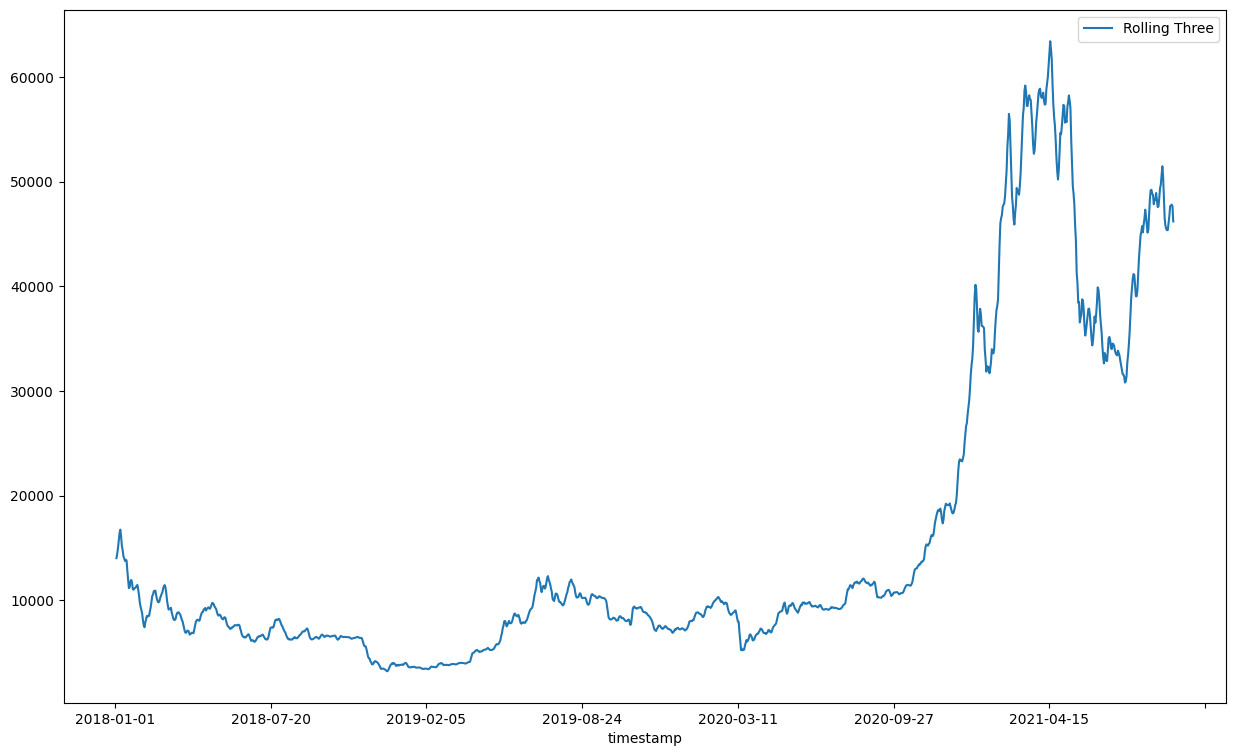

In [167]:
bitcoin["Rolling Three"] = bitcoin["Close"].rolling(3).mean()
bitcoin.plot(x="timestamp",y="Rolling Three")

In [ ]:
ii) Using the previous seven day period

<Axes: xlabel='timestamp'>

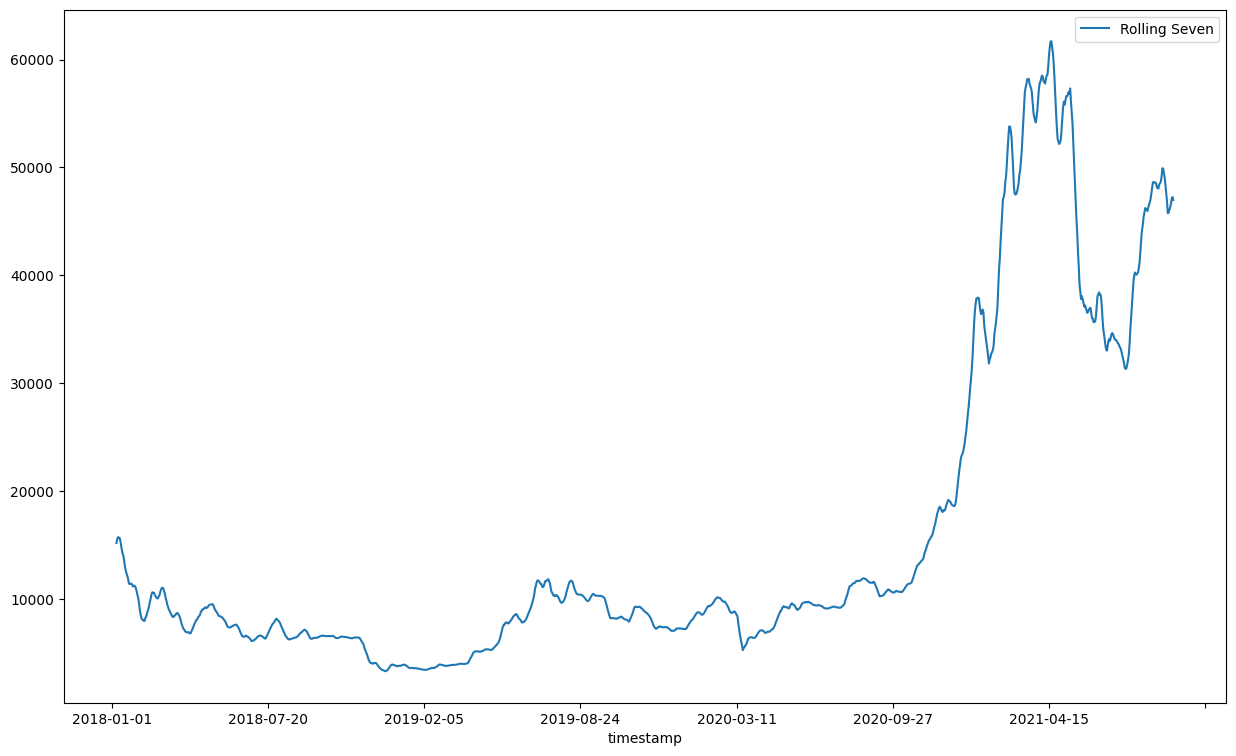

In [168]:
bitcoin["Rolling Seven"] = bitcoin["Close"].rolling(7).mean()
bitcoin.plot(x="timestamp",y="Rolling Seven")

In [ ]:
iii) Using the previous fourteen day period

<Axes: xlabel='timestamp'>

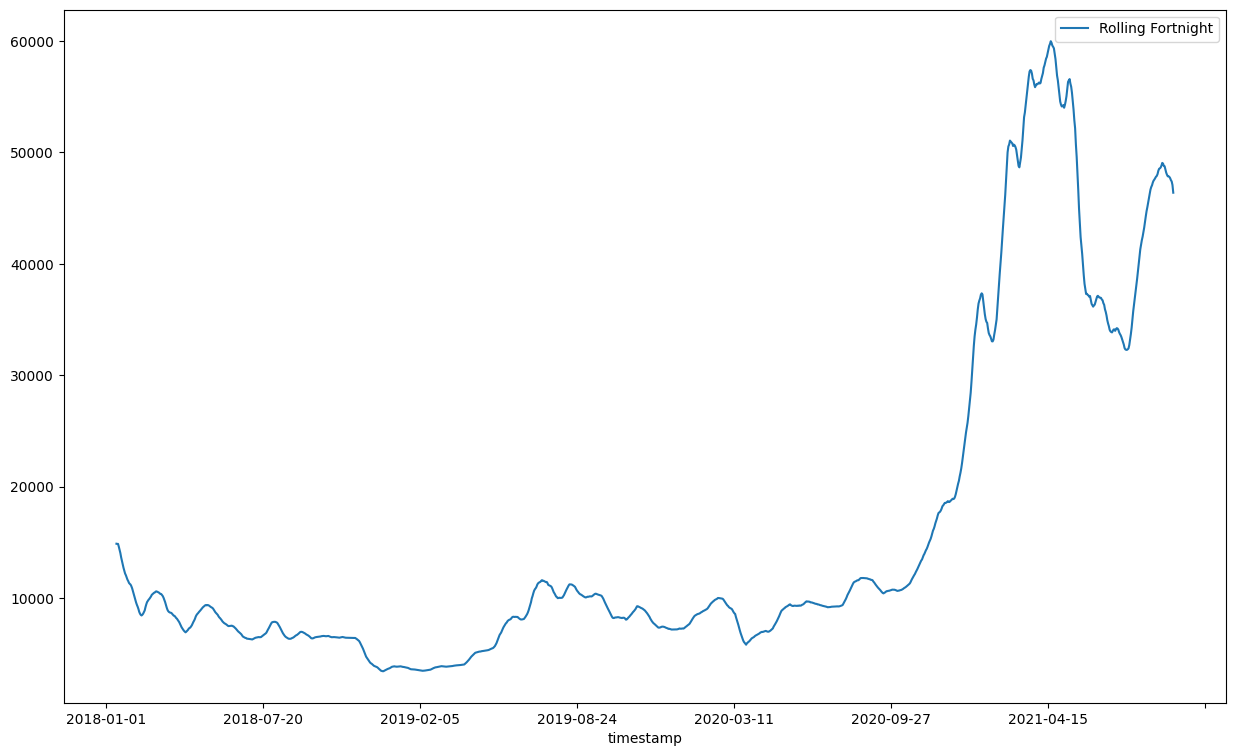

In [169]:
bitcoin["Rolling Fortnight"] = bitcoin["Close"].rolling(14).mean()
bitcoin.plot(x="timestamp",y="Rolling Fortnight")

In [ ]:
b) Plot a simple moving average on the same graph as the daily closing price of Bitcoin. Choose the one you think is the most informative.

<Axes: xlabel='timestamp'>

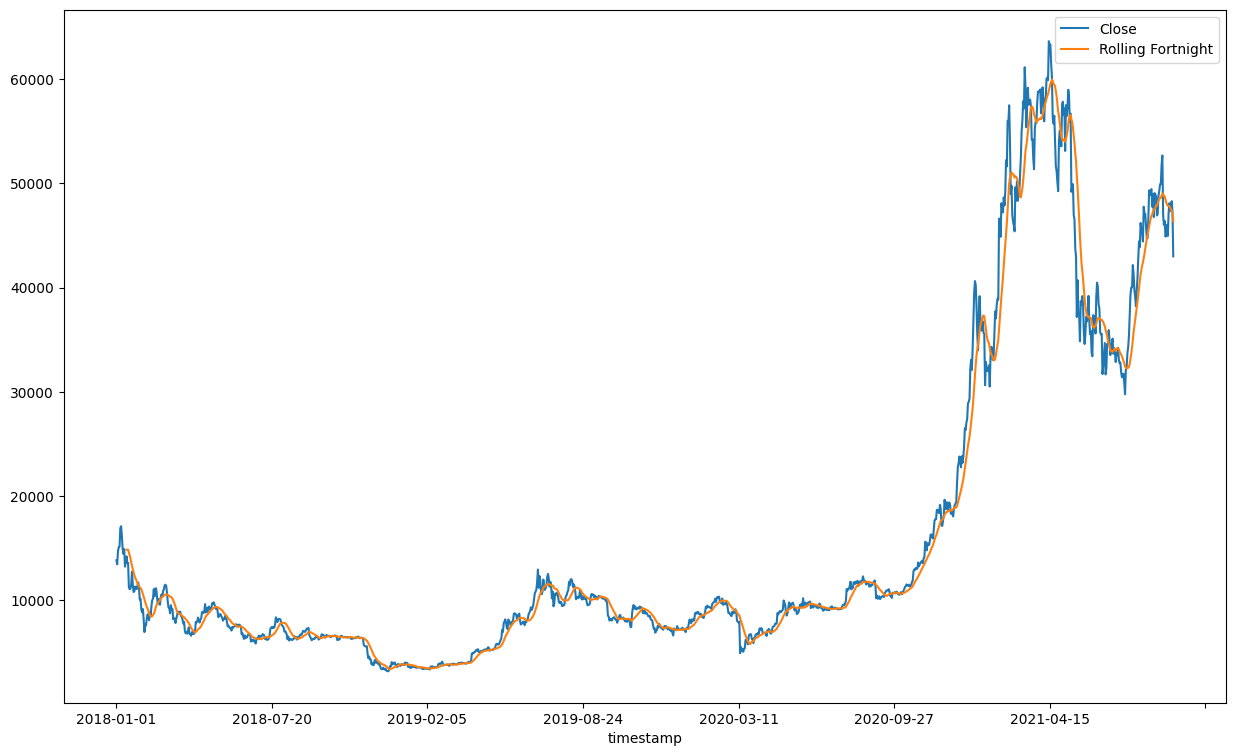

In [170]:
ax = plt.gca()
bitcoin.plot(x="timestamp",y="Close",ax=ax)
bitcoin.plot(x="timestamp",y="Rolling Fortnight",ax=ax)

In [ ]:
Q3. Crypto-currency is a famously *volatile* asset. This means that the price of a crypto-currency can change by a large amount in a small amount of time. One way of measuring the volatility of a crypto-currency is by looking at the standard-deviation in the closing price over a period of time. The standard deviation reflects the average amount of stock price has differed from the mean over a period of time. It is calculated by determining the mean price for a period of time (the sum of the values in a period of time, divided by the number of values) and then subtracting this figure from each price point. The differences are then squared, summer and averaged to produce the variance. The standard deviation is the square root of the variance.

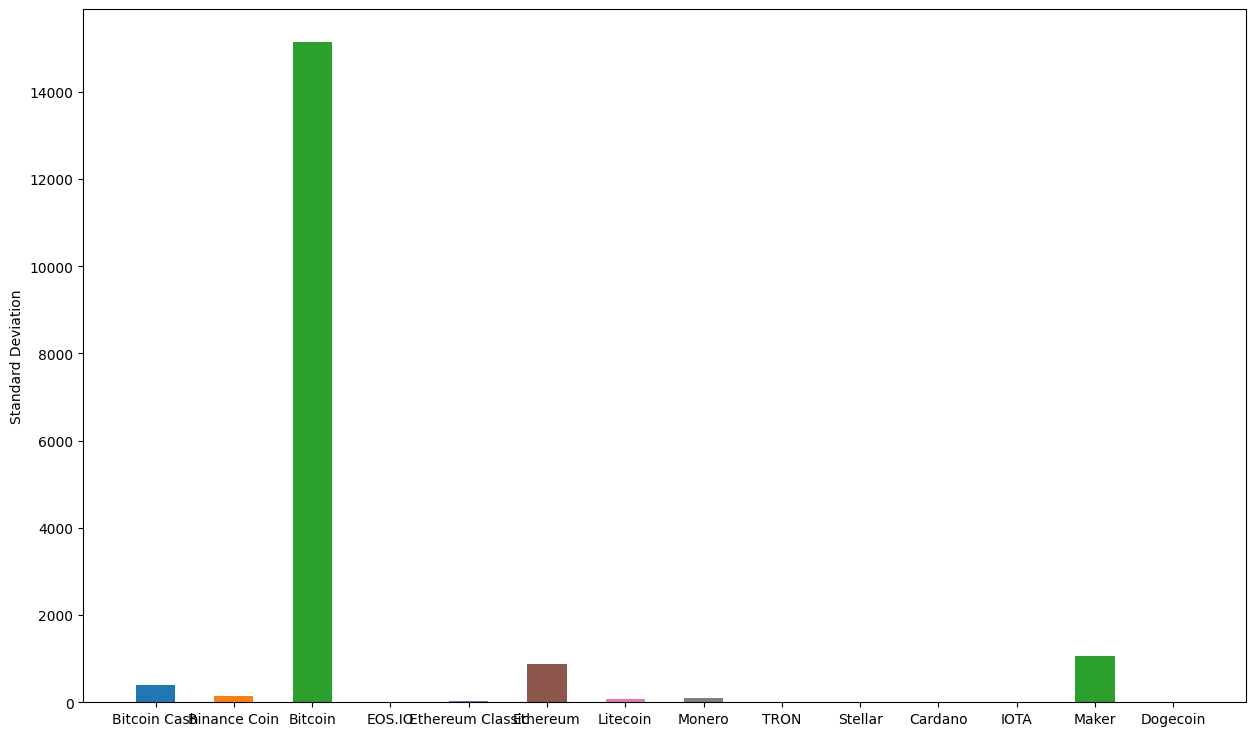

In [171]:
for asset in assets:
    asset_info = df[ df["Asset_Name"] == asset]
    asset_std = asset_info["Close"].std()
    plt.bar(asset,asset_std,width=0.5)
    plt.ylabel("Standard Deviation")

In [ ]:
Like the simple moving average, the standard deviation can also be used as an indicator for how volatility is changing over time.
b) Plot the standard deviation of the daily closing price of Ethereum starting for each day

ROLLING STANDARD DEVIATION

In [ ]:
i) Using the previous three day period

<Axes: xlabel='timestamp'>

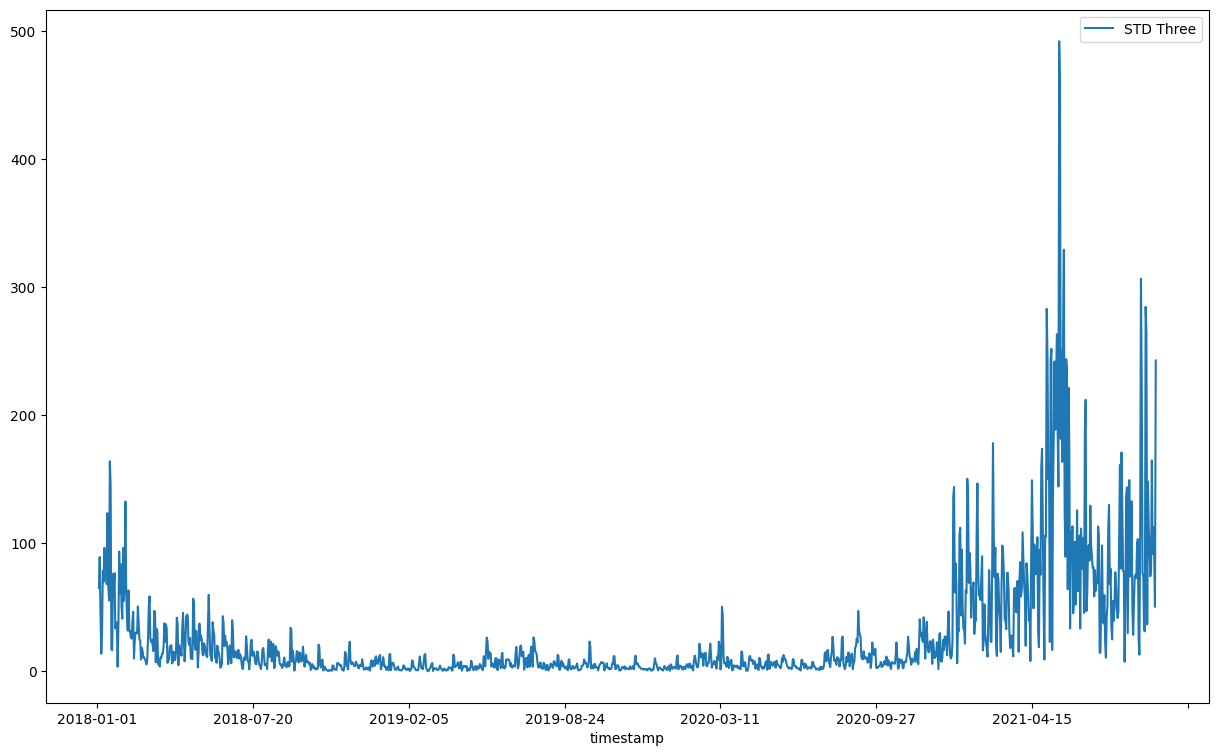

In [172]:
ethereum["STD Three"] = ethereum["Close"].rolling(3).std()
ethereum.plot(x="timestamp",y="STD Three")

In [ ]:
ii) Using the previous seven day period

<Axes: xlabel='timestamp'>

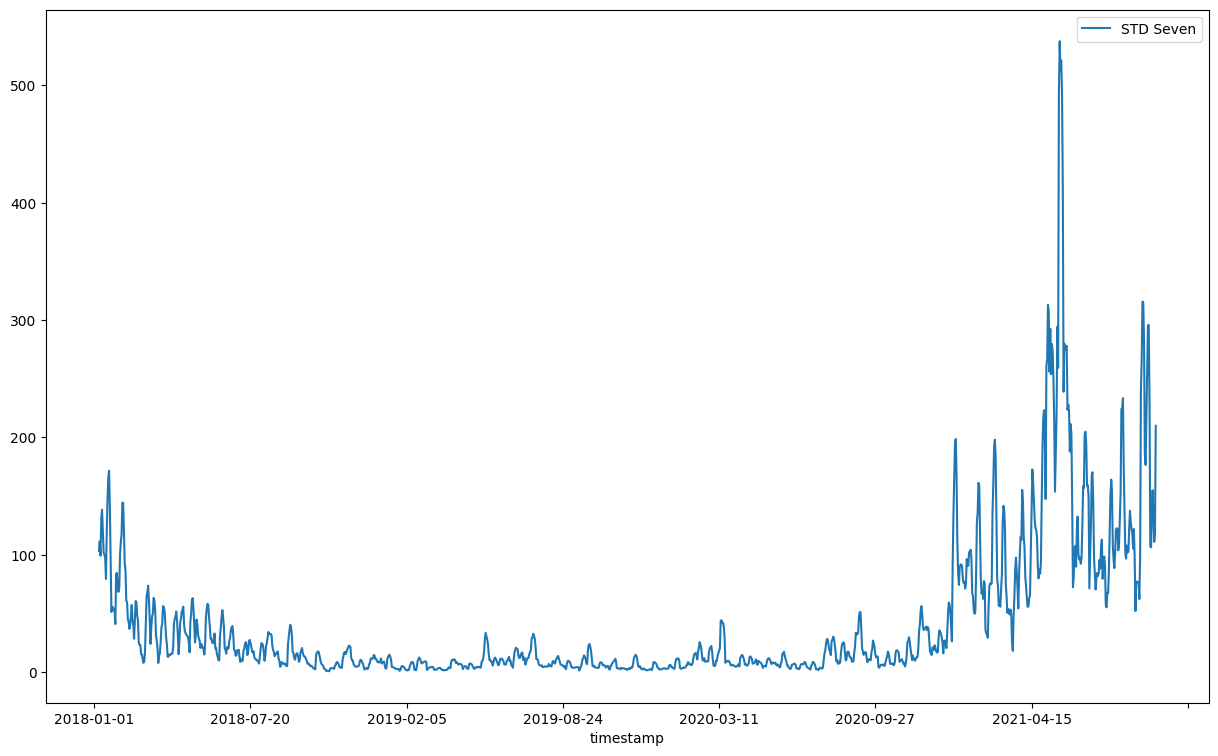

In [173]:
ethereum["STD Seven"] = ethereum["Close"].rolling(7).std()
ethereum.plot(x="timestamp",y="STD Seven")

In [ ]:
iii) Using the previous fourteen day period

<Axes: xlabel='timestamp'>

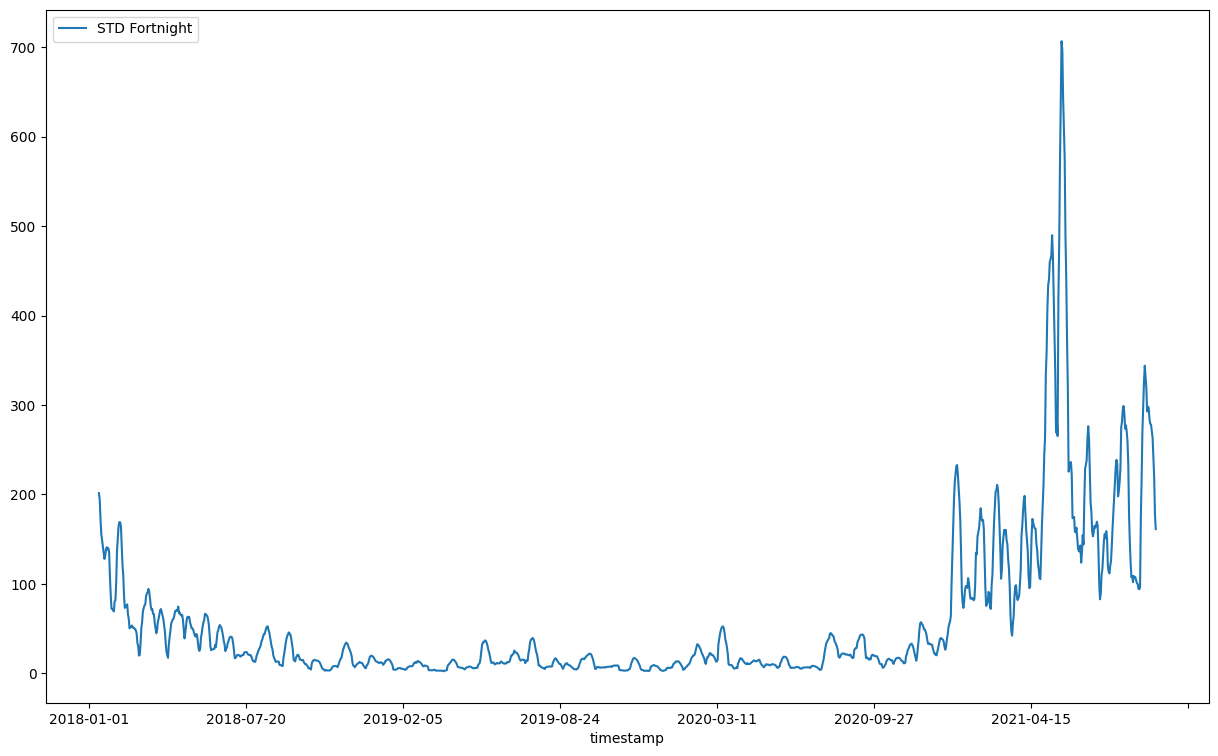

In [174]:
ethereum["STD Fortnight"] = ethereum["Close"].rolling(14).std()
ethereum.plot(x="timestamp",y="STD Fortnight")

In [ ]:
[Hard]
    Q4. Using the simple moving average and the standard-deviation, we can plot 'Bollinger Bands', a type of statistical chart used in technical analysis. You can read more about how Bollinger bands are used online at Investopedia.

In [ ]:
a) Plot the simple moving average for a crypto-currency of your choosing (CARDANO). Use a time period of your choice (20 days is common).

In [222]:
#using groupby
groups = df.groupby('Asset_Name') #if we didn't do groupby and just calculated SMA, we would be doing so for all coins regardless of their asset_name which is wrong
bitcoin_group = groups.get_group('Bitcoin').copy()
bitcoin_group['Rolling Twenty'] = bitcoin_group['Close'].rolling(20).mean().reset_index()['Close'] #need reset index as groupby leaves us with Multi-Level Index
bitcoin_group.head(50)
#groups.get_group('Bitcoin').plot(x="timestamp",y="Close")

Asset_Name   timestamp       Close  Rolling Twenty   Upper Band  \
2720    Bitcoin  2018-01-01  13850.1760             NaN          NaN   
2721    Bitcoin  2018-01-02  13468.6980             NaN          NaN   
2722    Bitcoin  2018-01-03  14743.4240             NaN          NaN   
2723    Bitcoin  2018-01-04  15107.7920             NaN          NaN   
2724    Bitcoin  2018-01-05  15158.4920             NaN          NaN   
2725    Bitcoin  2018-01-06  16935.5560             NaN          NaN   
2726    Bitcoin  2018-01-07  17118.7640             NaN          NaN   
2727    Bitcoin  2018-01-08  16174.2625             NaN          NaN   
2728    Bitcoin  2018-01-09  14941.9780             NaN          NaN   
2729    Bitcoin  2018-01-10  14463.1640             NaN          NaN   
2730    Bitcoin  2018-01-11  14915.5380             NaN          NaN   
2731    Bitcoin  2018-01-12  13240.4860             NaN          NaN   
2732    Bitcoin  2018-01-13  13816.5600             NaN          NaN   
2733    Bitcoin  2018-01-14  14228.8633             NaN          NaN   
2734    Bitcoin  2018-01-15  13582.4852             NaN          NaN   
2735    Bitcoin  2018-01-16  13581.8533             NaN          NaN   
2736    Bitcoin  2018-01-17  11256.2000             NaN          NaN   
2737    Bitcoin  2018-01-18  11082.9950             NaN          NaN   
2738    Bitcoin  2018-01-19  11119.6967             NaN          NaN   
2739    Bitcoin  2018-01-20  11520.7483             NaN  5893.866546   
2740    Bitcoin  2018-01-21  12767.3733             NaN  5919.764291   
2741    Bitcoin  2018-01-22  11538.6183             NaN  6048.487452   
2742    Bitcoin  2018-01-23  10811.5500             NaN  6213.692922   
2743    Bitcoin  2018-01-24  10866.3917             NaN  6294.081827   
2744    Bitcoin  2018-01-25  11337.3867             NaN  6280.873206   
2745    Bitcoin  2018-01-26  11144.1983             NaN  5960.488145   
2746    Bitcoin  2018-01-27  11088.8087             NaN  5463.444697   
2747    Bitcoin  2018-01-28  11423.4700             NaN  5028.246916   
2748    Bitcoin  2018-01-29  11724.5233             NaN  4765.186000   
2749    Bitcoin  2018-01-30  11205.6167             NaN  4564.693474   
2750    Bitcoin  2018-01-31  10082.6650             NaN  4287.798157   
2751    Bitcoin  2018-02-01  10161.0783             NaN  4265.355224   
2752    Bitcoin  2018-02-02   9118.2450             NaN  4252.801257   
2753    Bitcoin  2018-02-03   8861.1483             NaN  4087.388464   
2754    Bitcoin  2018-02-04   9165.8317             NaN  3916.208524   
2755    Bitcoin  2018-02-05   8195.7183             NaN  3838.834865   
2756    Bitcoin  2018-02-06   6962.5517             NaN  4334.770961   
2757    Bitcoin  2018-02-07   7698.4400             NaN  4548.256488   
2758    Bitcoin  2018-02-08   7589.4067             NaN  4721.933198   
2759    Bitcoin  2018-02-09   8246.7675             NaN  4739.294764   
2760    Bitcoin  2018-02-10   8666.8260             NaN  4480.798614   
2761    Bitcoin  2018-02-11   8550.4940             NaN  4386.649319   
2762    Bitcoin  2018-02-12   8105.6150             NaN  4388.995596   
2763    Bitcoin  2018-02-13   8893.3917             NaN  4314.187107   
2764    Bitcoin  2018-02-14   8533.6733             NaN  4172.281725   
2765    Bitcoin  2018-02-15   9447.1733             NaN  4021.383038   
2766    Bitcoin  2018-02-16  10011.3433             NaN  3890.750793   
2767    Bitcoin  2018-02-17  10167.6017             NaN  3706.909453   
2768    Bitcoin  2018-02-18  11072.9633             NaN  3559.530425   
2769    Bitcoin  2018-02-19  10393.4583             NaN  3411.833207   

       Lower Band  
2720          NaN  
2721          NaN  
2722          NaN  
2723          NaN  
2724          NaN  
2725          NaN  
2726          NaN  
2727          NaN  
2728          NaN  
2729          NaN  
2730          NaN  
2731          NaN  
2732          NaN  
2733          NaN  
2734          NaN  
2735        

In [ ]:
b) Plot a line which is two times the standard deviation of the same time period higher than the simple moving average.

In [219]:
bitcoin_std = groups.get_group('Bitcoin')['Close'].rolling(20).std()
bitcoin_group = groups.get_group('Bitcoin').copy()
bitcoin_group['Upper Band'] = bitcoin_std*2+bitcoin_group['Rolling Twenty']
#bitcoin_group.plot(x="timestamp",y="Upper Band")

bitcoin_group

Asset_Name   timestamp       Close  Rolling Twenty   Upper Band  \
2720    Bitcoin  2018-01-01  13850.1760             NaN          NaN   
2721    Bitcoin  2018-01-02  13468.6980             NaN          NaN   
2722    Bitcoin  2018-01-03  14743.4240             NaN          NaN   
2723    Bitcoin  2018-01-04  15107.7920             NaN          NaN   
2724    Bitcoin  2018-01-05  15158.4920             NaN          NaN   
...         ...         ...         ...             ...          ...   
4075    Bitcoin  2021-09-17  47769.5096      666.238815  4978.877365   
4076    Bitcoin  2021-09-18  47333.4914      664.937815  4953.255396   
4077    Bitcoin  2021-09-19  48295.5087      663.442730  4937.013754   
4078    Bitcoin  2021-09-20  47272.4743      662.301845  4924.305944   
4079    Bitcoin  2021-09-21  43002.5050      657.586895  5422.195131   

       Lower Band  
2720          NaN  
2721          NaN  
2722          NaN  
2723          NaN  
2724          NaN  
...           ...  
4075 -3646.399735  
4076 -3623.379766  
4077 -3610.128294  
4078 -3599.702254  
4079 -4107.021341  

[1360 rows x 6 columns]

In [214]:
bitcoin_std

2720            NaN
2721            NaN
2722            NaN
2723            NaN
2724            NaN
           ...     
4075    2156.319275
4076    2144.158791
4077    2136.785512
4078    2131.002050
4079    2382.304118
Name: Close, Length: 1360, dtype: float64

In [ ]:
c) Plot a line which is two times the standard deviation of the same time period lower than the simple moving average.

<Axes: xlabel='timestamp'>

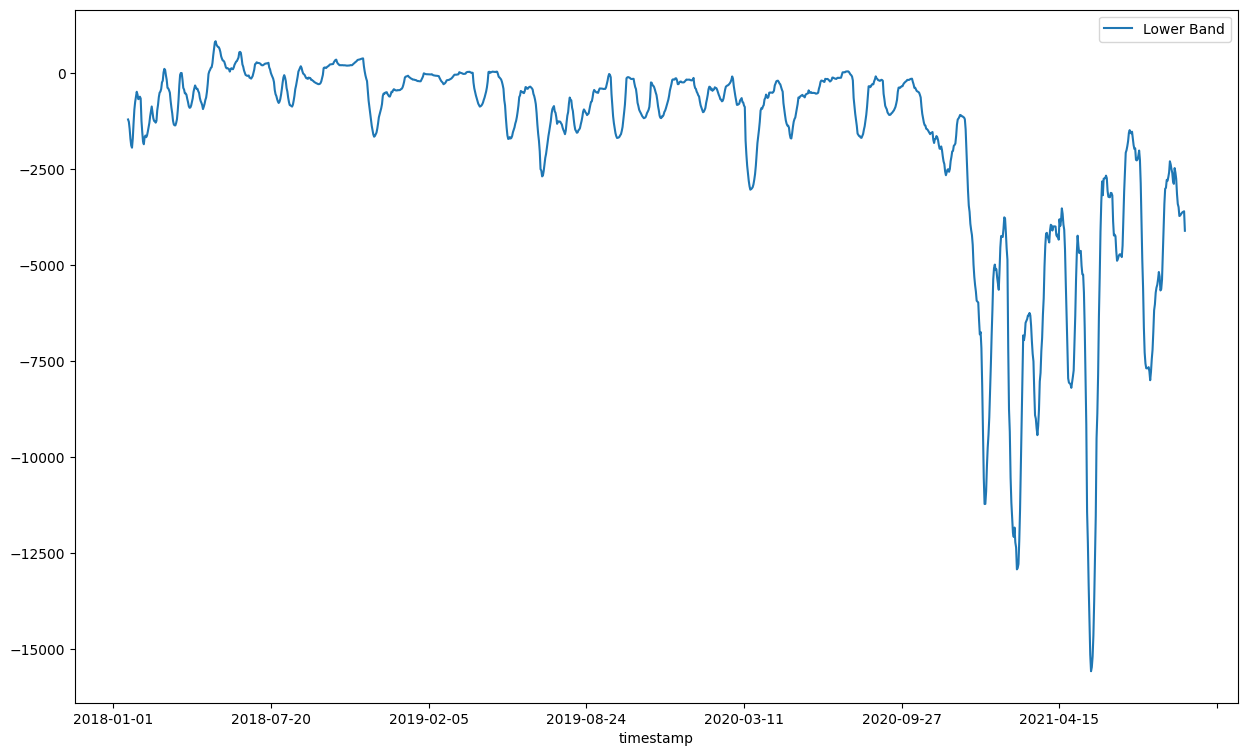

In [215]:
bitcoin_group['Lower Band'] = bitcoin_group['Rolling Twenty']-2*bitcoin_std
bitcoin_group.plot(x="timestamp",y="Lower Band")

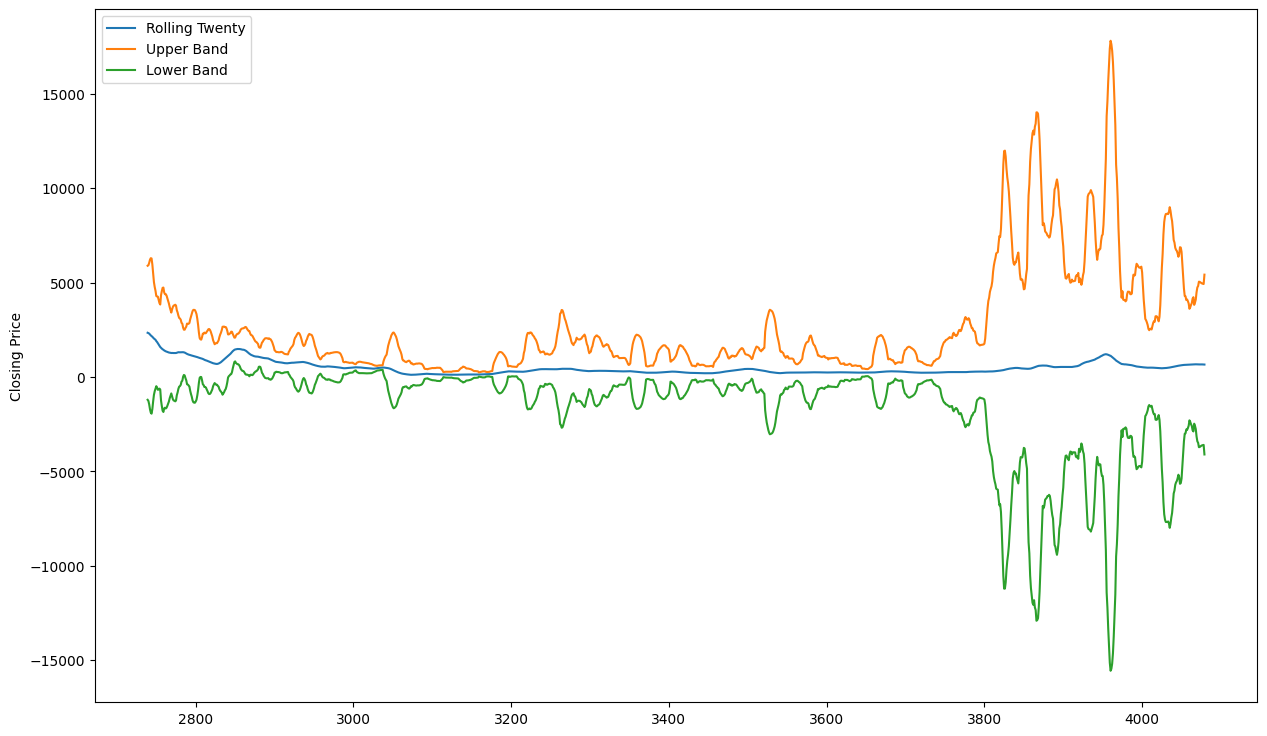

In [216]:
bollinger_bands = ['Rolling Twenty', 'Upper Band', 'Lower Band']
for line in bollinger_bands:
    line = groups.get_group('Bitcoin')[line]
    line.plot(x="timestamp",y=line)
plt.ylabel("Closing Price")
plt.legend()